In [1]:
import numpy as np
import matplotlib.pyplot as plt

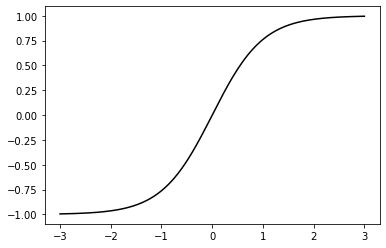

In [2]:
plt.plot(np.linspace(-3,3,200), np.tanh(np.linspace(-3,3,200)), 'k-')
plt.show()

In [7]:
class init_experiment:
    def __init__(self, num_node, num_layers, std, act_f):
        self.num_layers = num_layers # 신경망 깊이
        self.num_node   = num_node # 신경망 너비
        self.w = np.random.randn(num_node, num_node) * std #표준편차 std인 정규분포 (평균 0)
        self.act_f = act_f # 활성화 함수
        self.activations = {} # 활성화 값 저장을 위한 딕셔너리
        self.activations[0] = np.random.randn(1000, num_node) # 입력데이터 1000개, 정규분포
        
        pass
    
    def run(self):
        for i in range(self.num_layers):
            x = self.activations[i]
            out = np.dot(x, self.w)
            out = self.act_f(out)
            self.activations[i+1] = out
        pass
    
    def visualize(self):
        if len(self.activations) == 1:
            self.run()
        plt.figure(figsize=(16, 6))
            
        for i, v in self.activations.items(): #key, value pair
            plt.subplot(1, len(self.activations), i+1)
            plt.title(str(i)+'layer')
            plt.hist(v.reshape(-1), 30, range=(-1,1))
        return plt.show()
            
        
        



In [8]:
tanh = lambda x : np.tanh(x)

In [9]:
test1 = init_experiment(100, 5, 1, tanh)

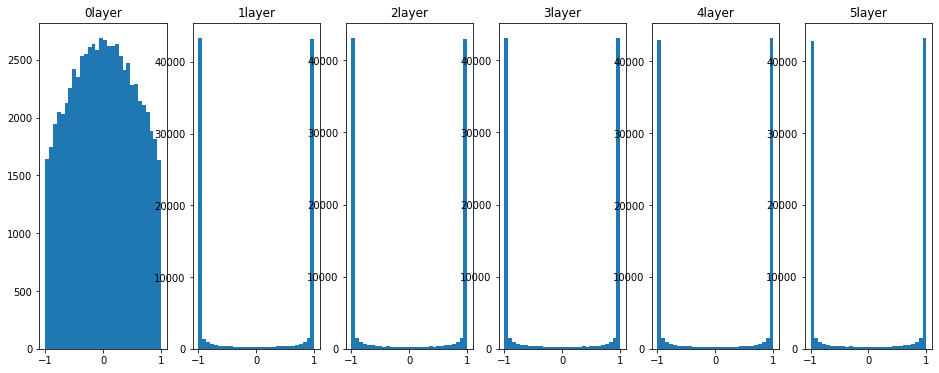

In [10]:
test1.visualize()

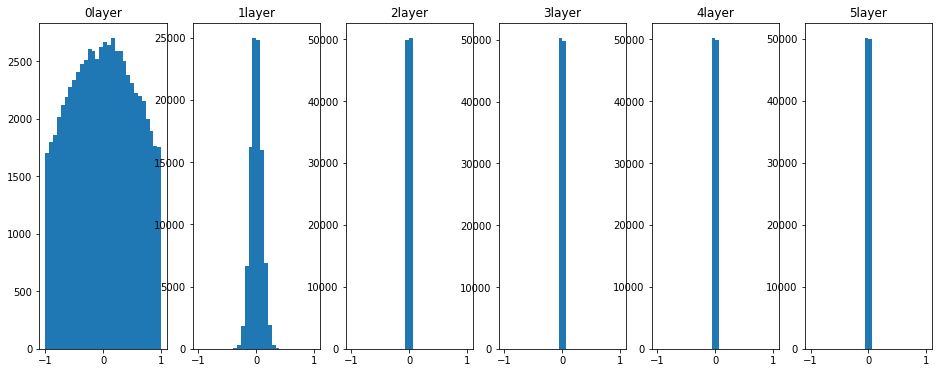

In [11]:
test2 = init_experiment(100, 5, 0.01, tanh)
test2.visualize()

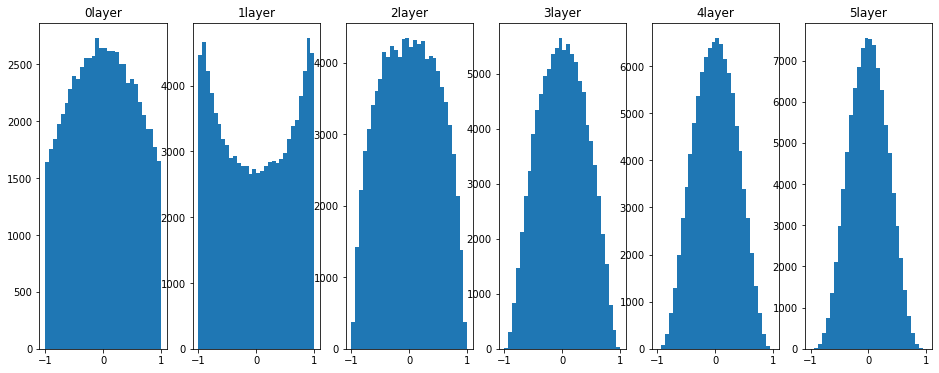

In [12]:
test3 = init_experiment(100, 5, 0.1, tanh) # Xaier 초기화
test3.visualize()

In [13]:
def relu(x):
    mask = (x <0)
    x[mask] = 0
    return x

In [14]:
relu(np.array([1,-1,1]))

array([1, 0, 1])

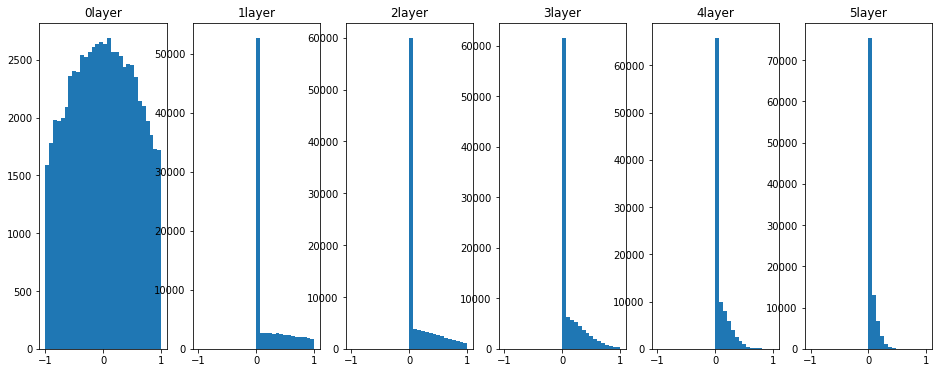

In [15]:
test4 = init_experiment(100, 5, 0.1, relu) # Xaier 초기화
test4.visualize()

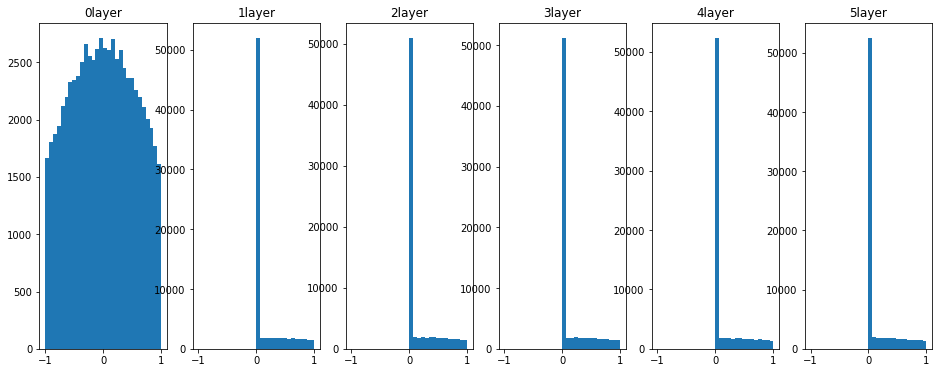

In [16]:
test5 = init_experiment(100, 5, np.sqrt(2/100), relu) # He 초기화
test5.visualize()